# Versuche mit Festigkeit 0

Analyse der Versuche mit Festigkeit 0.

In [1]:
import io, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
from sklearn.experimental import enable_halving_search_cv
from sklearn import model_selection, svm, metrics, manifold, preprocessing
import joblib

import prepare

In [2]:
BASE_DIR = 'renamed'
DATA_OK = ['ok', 'near_ok_sonowechsel']
DATA_FEHLER = ['fehler_oel', 'fehler_leitungsversatz', 'fehler_terminversatz']
DATA_ALL = DATA_OK + DATA_FEHLER

In [3]:
DATA_ALL

['ok',
 'near_ok_sonowechsel',
 'fehler_oel',
 'fehler_leitungsversatz',
 'fehler_terminversatz']

In [4]:
zugversuche, kurven = prepare.read_all(BASE_DIR, DATA_ALL)

ok_: count 200 rows 1407...1650
near_ok_sonowechsel_: count 100 rows 1582...1759
fehler_oel_: count 100 rows 1052...1434
fehler_leitungsversatz_: count 100 rows 1716...2403
fehler_terminversatz_: count 100 rows 1702...2092


Debugausgabe

In [5]:
zugversuche

,nr,festigkeit,key,label,label_text
0,1569,2600.000000,ok_1569,0,ok
1,1570,2750.000000,ok_1570,0,ok
2,1571,2770.000000,ok_1571,0,ok
3,1572,2660.000000,ok_1572,0,ok
4,1573,2810.000000,ok_1573,0,ok
...,...,...,...,...,...
595,2505,1479.522827,fehler_terminversatz_2505,4,fehler_terminversatz
596,2506,2085.117920,fehler_terminversatz_2506,4,fehler_terminversatz
597,2507,2237.231201,fehler_terminversatz_2507,4,fehler_terminversatz
598,2508,2406.469482,fehler_terminversatz_2508,4,fehler_terminversatz


In [6]:
versuche_oel_1 = zugversuche[(zugversuche.label==2) & (zugversuche.festigkeit>=10)]
versuche_0 = zugversuche[zugversuche.festigkeit<10]
versuche_0

,nr,festigkeit,key,label,label_text
301,2009,0.0,fehler_oel_2009,2,fehler_oel
302,2010,0.0,fehler_oel_2010,2,fehler_oel
303,2011,0.0,fehler_oel_2011,2,fehler_oel
305,2013,0.0,fehler_oel_2013,2,fehler_oel
307,2015,0.0,fehler_oel_2015,2,fehler_oel
309,2017,0.0,fehler_oel_2017,2,fehler_oel
310,2018,0.0,fehler_oel_2018,2,fehler_oel
311,2019,0.0,fehler_oel_2019,2,fehler_oel
312,2020,0.0,fehler_oel_2020,2,fehler_oel
313,2021,0.0,fehler_oel_2021,2,fehler_oel


In [7]:
versuche_oel_1

,nr,festigkeit,key,label,label_text
300,2008,193.0,fehler_oel_2008,2,fehler_oel
304,2012,553.0,fehler_oel_2012,2,fehler_oel
306,2014,799.0,fehler_oel_2014,2,fehler_oel
308,2016,362.0,fehler_oel_2016,2,fehler_oel
315,2023,2070.0,fehler_oel_2023,2,fehler_oel
316,2024,364.0,fehler_oel_2024,2,fehler_oel
321,2029,485.0,fehler_oel_2029,2,fehler_oel
322,2030,352.0,fehler_oel_2030,2,fehler_oel
323,2031,126.0,fehler_oel_2031,2,fehler_oel
324,2032,728.0,fehler_oel_2032,2,fehler_oel


Vergleich Festigkeit 0 mit Oelkurven Festigkeit > 0

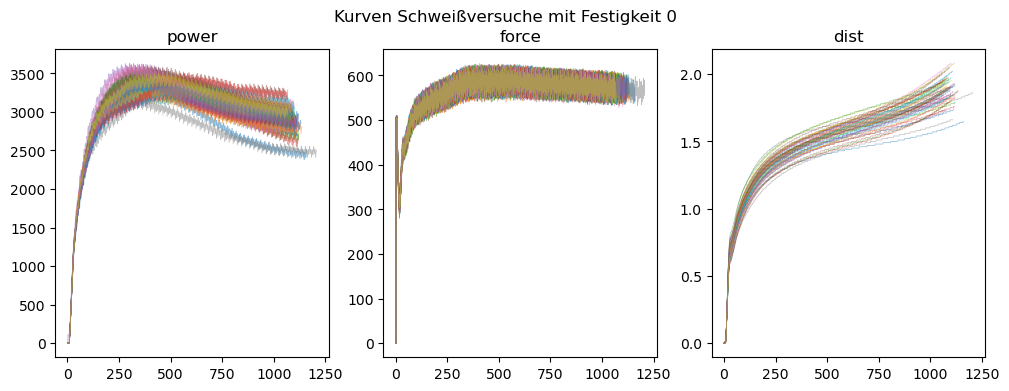

In [8]:
plt.figure(figsize=(12,4))
for (i, feature) in enumerate(['power', 'force', 'dist']):
    plt.subplot(1, 3, i+1)                              
    for key in versuche_0.key:
        curve = kurven[key]
        plt.plot(curve.ms, curve[feature], alpha=0.5, linewidth=0.5)
    plt.title(feature)
plt.suptitle('Kurven Schweißversuche mit Festigkeit 0')
plt.show()

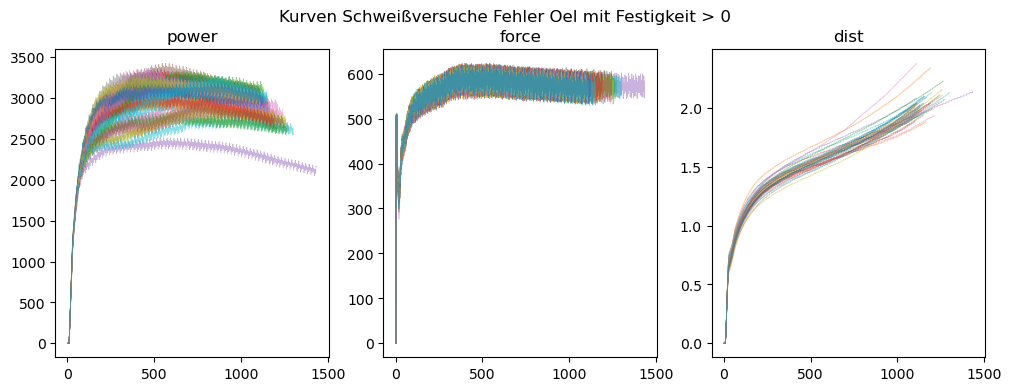

In [9]:
plt.figure(figsize=(12,4))
for (i, feature) in enumerate(['power', 'force', 'dist']):
    plt.subplot(1, 3, i+1)                              
    for key in versuche_oel_1.key:
        curve = kurven[key]
        plt.plot(curve.ms, curve[feature], alpha=0.5, linewidth=0.5)
        plt.title(feature)
plt.suptitle('Kurven Schweißversuche Fehler Oel mit Festigkeit > 0')
plt.show()

- Bei Festigkeit 0 ist Power meist höher
- kein klares Bild

Analyse anhand der statistischen Features

In [10]:
stat_feat = prepare.StatFeatures()
stat_feat.fit()

StatFeatures()

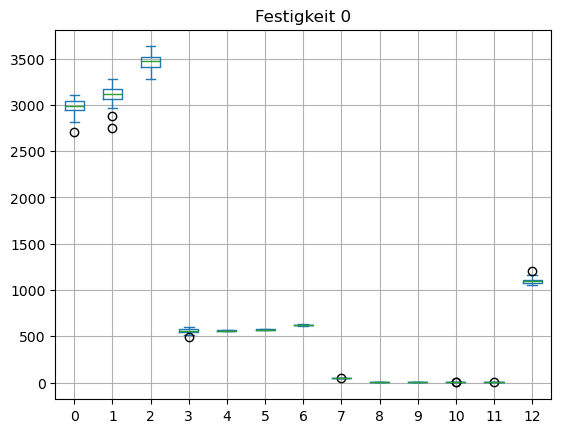

In [11]:
feat0 = stat_feat.transform(versuche_0.key, kurven)
pd.DataFrame(feat0).plot(kind='box')
plt.grid()
plt.title('Festigkeit 0')
plt.show()

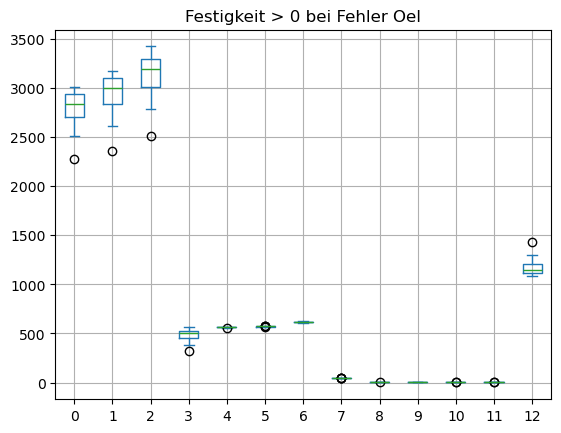

In [13]:
feat1 = stat_feat.transform(versuche_oel_1.key, kurven)
pd.DataFrame(feat1).plot(kind='box')
plt.grid()
plt.title('Festigkeit > 0 bei Fehler Oel')
plt.show()

Auch hier kein klares Bild.